In [ ]:
# The dataset is from: https://www.inspq.qc.ca/covid-19/donnees

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from rdd import rdd
from datetime import datetime

In [16]:
# diff from S
queb_cases = pd.read_csv('Confirmed_Cases_week.csv')
# covid.sort_values('Episode week')
queb_cases.sample(10)

,Date de déclaration du cas,Par lien épidémiologique,En laboratoire
237,2020-10-18 00:00:00,23,951
226,2020-10-07 00:00:00,25,956
167,2020-08-09 00:00:00,6,92
166,2020-08-08 00:00:00,8,106
129,2020-07-02 00:00:00,8,62
299,2020-12-19 00:00:00,8,2058
23,2020-03-18 00:00:00,1,40
137,2020-07-10 00:00:00,3,110
172,2020-08-14 00:00:00,6,71
244,2020-10-25 00:00:00,12,820


In [17]:
# diff from S
cov = queb_cases.copy()
cov['Total Cases'] = cov['Par lien épidémiologique'] + cov['En laboratoire'] 
cov.head()

,Date de déclaration du cas,Par lien épidémiologique,En laboratoire,Total Cases
0,2020-02-24 00:00:00,0,0,0
1,2020-02-25 00:00:00,0,1,1
2,2020-02-26 00:00:00,0,0,0
3,2020-02-27 00:00:00,0,0,0
4,2020-02-28 00:00:00,0,1,1


In [18]:
# diff from S
cov['Day'] = cov.index+1
cov.tail()

,Date de déclaration du cas,Par lien épidémiologique,En laboratoire,Total Cases,Day
328,2021-01-17 00:00:00,15,1514,1529,329
329,2021-01-18 00:00:00,19,1328,1347,330
330,2021-01-19 00:00:00,8,1518,1526,331
331,2021-01-20 00:00:00,6,1582,1588,332
332,2021-01-21 00:00:00,12,1092,1104,333


In [19]:
# #Convert to Date Time object
cov['Date de déclaration du cas'] = pd.to_datetime(cov['Date de déclaration du cas'])


In [20]:
# #Rename the colum
cov = cov.rename(columns={'Date de déclaration du cas':'Date'})
cov.head()

,Date,Par lien épidémiologique,En laboratoire,Total Cases,Day
0,2020-02-24,0,0,0,1
1,2020-02-25,0,1,1,2
2,2020-02-26,0,0,0,3
3,2020-02-27,0,0,0,4
4,2020-02-28,0,1,1,5


In [ ]:
# we don't need to do this whole resaving thing

####################################
#Code used to format the csv file

# #Make a total cases col
# cov_cases['Total Cases'] = cov_cases.sum(axis=1)
# #Rename the colum
# cov_cases = cov_cases.rename(columns={'Date de déclaration du cas':'Date'})
# #Make index start at 1
# cov_cases.index += 1
# #Save as csv with added index 
# cov_cases.to_csv('Data/info',index=True)
# #Open
# cases = pd.read_csv('Data/Covid_Cases_QC2')
# #Re save without adding index
# cases.to_csv('Data/Covid_Cases_QC2',index=False)
# ######################################

In [21]:
cov['Day_sq'] = cov['Day'].apply(np.square)
cov['Date'] = pd.to_datetime(cov['Date'])
LOCKDOWN_1 = pd.to_datetime('2020-3-20')        
SCHOOL_OPEN = pd.to_datetime('2020-8-31')
LOCKDOWN_2 = pd.to_datetime('2020-12-25')

In [22]:
#Days before and after first lockdown 
pre_LD1 = (cov['Date'] > '2020-2-21') & (cov['Date'] <= LOCKDOWN_1 )
post_LD1 = (cov['Date'] > LOCKDOWN_1) & (cov['Date'] <= '2020-4-24' )

#Entire period we are looking at
period1 = (cov['Date'] > '2020-2-21') & (cov['Date'] <= '2020-4-24')

#Days before and after school opening
pre_sch = (cov['Date'] > '2020-8-3') & (cov['Date'] <= SCHOOL_OPEN)
post_sch = (cov['Date'] > SCHOOL_OPEN) & (cov['Date'] <= '2020-10-12') 

period2 = (cov['Date'] > '2020-8-3') & (cov['Date'] <= '2020-10-12')

#Days before and after xmas lockdown
pre_xmas = (cov['Date'] > '2020-11-27') & (cov['Date'] <= LOCKDOWN_2)
post_xmas = (cov['Date'] > LOCKDOWN_2) & (cov['Date'] <= '2021-1-22')

period3 = (cov['Date'] > '2020-11-27') & (cov['Date'] <= '2021-1-22')

In [23]:
#Time periods for each graph

#Graph 1

#Temp df pre-lockdown 1
temp_prld = cov.loc[pre_LD1]
#Temp df post-lockdown 1
temp_pold = cov.loc[post_LD1]
#Temp df entire period around LD 1
temp_pd1 = cov.loc[period1]

#Graph 2

#Temp df pre-school opening
temp_prsc = cov.loc[pre_sch]
#Temp df post-school opening
temp_posc = cov.loc[post_sch]
#Temp df entire period around school opening 1
temp_pd2 = cov.loc[period2]

#Graph 3

#Temp df pre-lockdown xmas
temp_prxs = cov.loc[pre_xmas]
#Temp df post-lockdown xmas
temp_poxs = cov.loc[post_xmas]
#Temp df entire period around xmas LD
temp_pd3 = cov.loc[period3]

In [35]:
#Pre-lockdown

X = temp_prld[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_prld['Total Cases']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)


model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Cases   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     8.573
Date:                Mon, 25 Jan 2021   Prob (F-statistic):            0.00165
Time:                        13:08:16   Log-Likelihood:                -106.21
No. Observations:                  26   AIC:                             218.4
Df Residuals:                      23   BIC:                             222.2
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6015     10.126      2.035      0.042       0.755      40.448
Day           -6.1341      2.315     -2.649      0.008     -10.672      -1.596
Day_sq         0.3213      0.102      3.148      0.002       0.121       0.521
==============================================================================
Omnibus:                       17.835   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.721
Skew:                           1.380   Prob(JB):                     1.58e-06
Kurtosis:                       7.129   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Post-Lockdown

X = temp_pold[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_pold['Total Cases']

model_2 = sm.OLS(y,X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Cases   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.34e-15
Time:                        13:02:57   Log-Likelihood:                -211.78
No. Observations:                  35   AIC:                             429.6
Df Residuals:                      32   BIC:                             434.2
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1901.3036    279.668     -6.798      0.000   -2449.443   -1353.164
Day          103.4131     13.737      7.528      0.000      76.488     130.338
Day_sq        -0.9579      0.155     -6.180      0.000      -1.262      -0.654
==============================================================================
Omnibus:                        0.312   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.244
Skew:                          -0.185   Prob(JB):                        0.885
Kurtosis:                       2.828   Cond. No.                     4.59e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 4.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

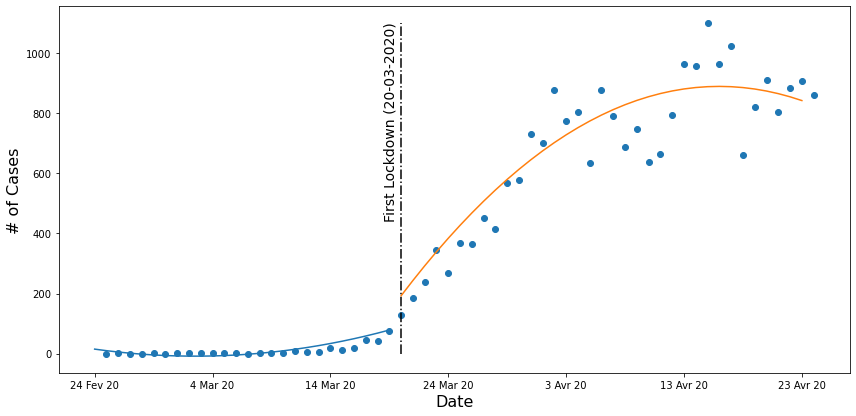

In [36]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=temp_pd1.Day,y=temp_pd1['Total Cases'],)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=450,x=24.5,s='First Lockdown (20-03-2020)',rotation=90,fontsize=14)
ax.vlines(x=26,ymin=temp_pd1['Total Cases'].min(),ymax=temp_pd1['Total Cases'].max(),linestyle='dashdot')
plt.xticks(np.linspace(0,60,7),('24 Fev 20','4 Mar 20','14 Mar 20','24 Mar 20','3 Avr 20','13 Avr 20',
                                '23 Avr 20'))

plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()

In [51]:
#Pre-School Opening

X = temp_prsc[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_prsc['Total Cases']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Cases   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     20.86
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           4.69e-06
Time:                        14:04:39   Log-Likelihood:                -120.81
No. Observations:                  28   AIC:                             247.6
Df Residuals:                      25   BIC:                             251.6
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.132e+04   1772.085      6.387      0.000    7844.552    1.48e+04
Day         -127.4177     20.061     -6.352      0.000    -166.736     -88.099
Day_sq         0.3610      0.057      6.373      0.000       0.250       0.472
==============================================================================
Omnibus:                        1.690   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.088
Skew:                          -0.483   Prob(JB):                        0.580
Kurtosis:                       2.985   Cond. No.                     1.67e+07
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#Post-School Opening

X = temp_posc[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_posc['Total Cases']

model_2 = sm.OLS(y,X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Cases   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     138.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.96e-18
Time:                        14:05:07   Log-Likelihood:                -260.95
No. Observations:                  42   AIC:                             527.9
Df Residuals:                      39   BIC:                             533.1
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8412.7945   8246.423     -1.020      0.308   -2.46e+04    7749.897
Day           58.5605     78.978      0.741      0.458     -96.234     213.355
Day_sq        -0.0748      0.189     -0.397      0.692      -0.445       0.295
==============================================================================
Omnibus:                        0.836   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.248
Skew:                          -0.136   Prob(JB):                        0.883
Kurtosis:                       3.260   Cond. No.                     1.54e+07
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

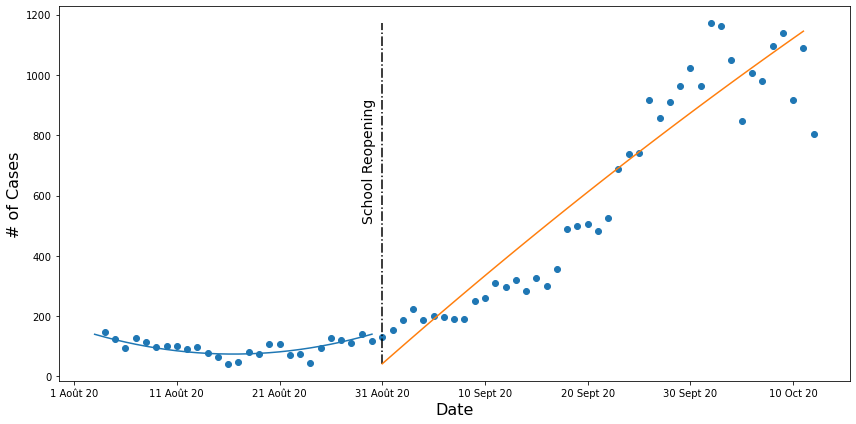

In [54]:

fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=temp_pd2.Day,y=temp_pd2['Total Cases'])
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=520,x=188,s='School Reopening',rotation=90,fontsize=14)
ax.vlines(x=190,ymin=temp_pd2['Total Cases'].min(),ymax=temp_pd2['Total Cases'].max(),linestyle='dashdot')
plt.xticks(np.linspace(160,230,8),('1 Août 20','11 Août 20','21 Août 20','31 Août 20',
                                   '10 Sept 20','20 Sept 20','30 Sept 20','10 Oct 20'))
plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()

In [42]:
#Pre-Xmas Lockdown

X = temp_prxs[['Day']]
X = sm.add_constant(X)

y = temp_prxs['Total Cases']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Cases   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     228.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.15e-14
Time:                        14:00:10   Log-Likelihood:                -171.30
No. Observations:                  28   AIC:                             346.6
Df Residuals:                      26   BIC:                             349.3
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8556.9335    685.326    -12.486      0.000   -9900.148   -7213.719
Day           35.5750      2.354     15.115      0.000      30.962      40.188
==============================================================================
Omnibus:                        1.716   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.018
Skew:                           0.466   Prob(JB):                        0.601
Kurtosis:                       3.066   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#Post-Xmas Lockdown
X = temp_poxs[['Day','Day_sq']]
X = sm.add_constant(X)

y = temp_poxs['Total Cases']

model_2 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Cases   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     47.70
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           4.35e-09
Time:                        14:02:02   Log-Likelihood:                -186.68
No. Observations:                  27   AIC:                             379.4
Df Residuals:                      24   BIC:                             383.2
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.057e+05    9.9e+04     -4.097      0.000      -6e+05   -2.12e+05
Day         2597.7186    618.503      4.200      0.000    1385.474    3809.963
Day_sq        -4.1318      0.965     -4.281      0.000      -6.023      -2.240
==============================================================================
Omnibus:                        1.725   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.041
Skew:                           0.060   Prob(JB):                        0.594
Kurtosis:                       2.045   Cond. No.                     1.94e+08
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.94e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

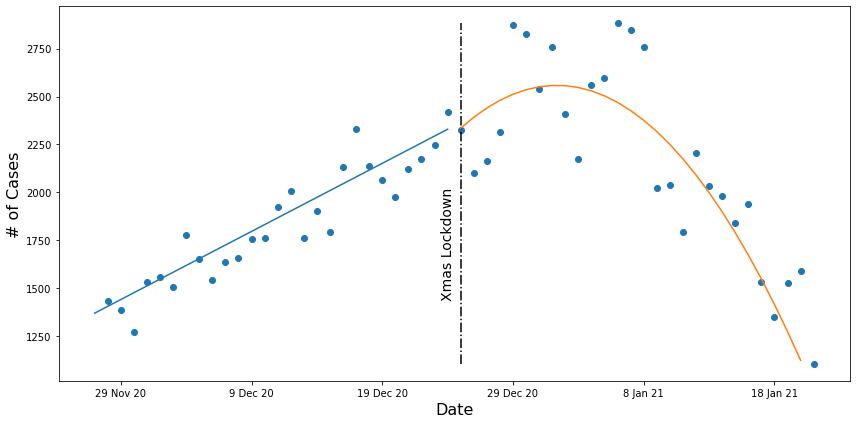

In [49]:

fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=temp_pd3.Day,y=temp_pd3['Total Cases'])
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=1450,x=304.5,s='Xmas Lockdown',rotation=90,fontsize=14)
ax.vlines(x=306,ymin=temp_pd3['Total Cases'].min(),ymax=temp_pd3['Total Cases'].max(),linestyle='dashdot')
plt.xticks(np.linspace(280,330,6),('29 Nov 20','9 Dec 20','19 Dec 20',
                                   '29 Dec 20','8 Jan 21','18 Jan 21'))

plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()

These graphs represent a visualization of the effect of certain events on the **number of Covid cases**
reported in Quebec. 

These events are:
- the first lockdown (20-03-2020)
- schools reopening (31-08-2020)
- the second lockdown (25-12-2020)


### Design considerations of the 3 graphs:
We decided to look at data spanning around 4 weeks pre-event and 6 weeks post-event. For the first event, we have no more than 4 weeks of data available pre-lockdown (Covid was not really on the radar prior to this). We chose to look at 6 weeks worth of data post-event to give the event some time to take effect. Since we know that in this particular case (Covid), symptoms can take up to 2 weeks to manifest, we can presume that there will be no real change seen in case growth for about a week to 2 weeks after the event takes place. Therefore we decided to perform analyses on 6 weeks of data following the event in order to account for those 2 weeks. Including a bit of a longer time after the cutoff also allowed us to fully appreciate the shape of the observations and how they might change.

**(will specify the shape for each individual graph)


### First Lockdown (20/03/2020)

For the first lockdown, both pre- and post-event models fit best with a polynomial design (x^2). As seen in the graph, a simple linear regression would not be a good fit for the curve of the data as time progresses.
Looking at the coefficients obtained by the models, pre-event reports a coeff of -6.1x and 0.3x^2 indicating an increasing increase in number of cases.
Post-event coeffs are 103.4x + -0.9x^2 indicating a decreasing increase in cases. 
(HOW TO FIND OUT IF THIS IS ACTUALLY DIFFERENT? lol)

### Schools reopening (31/08/2020)


### Christmas Lockdown (25/12/2020)

Prior to the Christmas lockdown, the cases were increasing at a rate of 35 cases per day (coeff of 35 for x). After lockdown was inforced... 

In [ ]:
# not done 